### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


## loading data

In [2]:
dataset=pd.read_excel("demand.xls")
dataset.head()

,date,issued
0,2017-01-02,34
1,2017-01-03,37
2,2017-01-04,29
3,2017-01-05,34
4,2017-01-06,45


In [3]:
dataset.set_index('date', inplace=True)


## missing value

In [4]:
dataset=dataset.fillna(method="ffill")

## graph data

<function matplotlib.pyplot.show(close=None, block=None)>

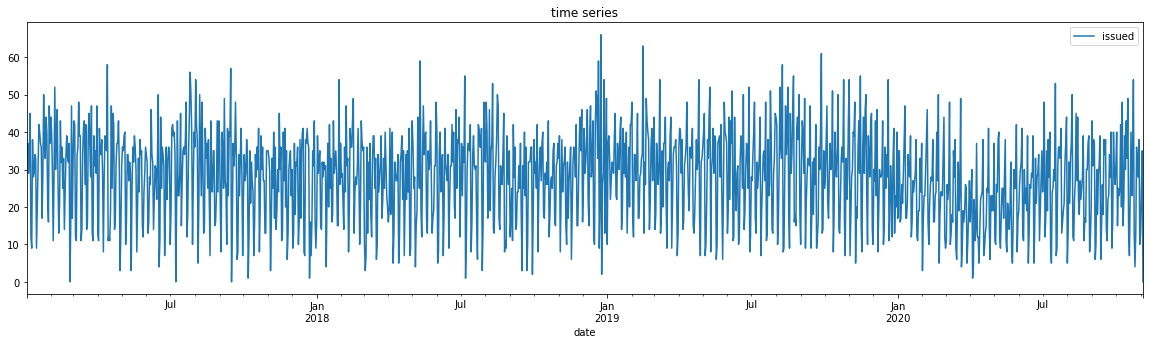

In [4]:
dataset.plot(figsize=(20,5))
plt.title("time series")
plt.show

## series to supervised

In [5]:
def to_supervised(dataset,n_input,n_out):
    #falten data
    data=dataset
    X,y=list(),list()
    in_start=0
    for _ in range(len(data)):
        in_end=in_start+ n_input
        out_end=in_end + n_out
        if out_end<=len(data):
            x_input=data[ in_start:in_end,0]
            x_input=x_input.reshape((len(x_input)))
            X.append(x_input)
            y.append(data[in_end:out_end,0])
        in_start+=1
    return array(X), array(y)    


## chose optimal lag Observation usinf ACF plot

In [7]:
#pip install statsmodels

In [7]:
import statsmodels.tsa.stattools as sts

In [9]:
sts.adfuller(dataset.issued)

(-3.888311907690799,
 0.0021225688542359346,
 22,
 1380,
 {'1%': -3.435097467737946,
  '5%': -2.8636366587977804,
  '10%': -2.5678862576139467},
 9542.05883916726)

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

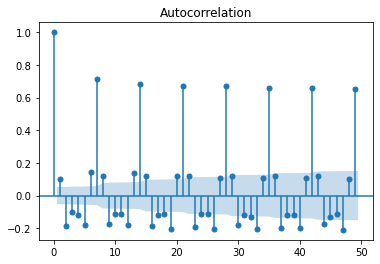

In [11]:
plot_acf(dataset, lags=49)
plt.show()

In [6]:
from numpy import array

In [7]:
dataset=np.array(dataset)

In [8]:
n_step=1
lags=180

In [9]:
X,y=to_supervised(dataset,n_input=lags,n_out=n_step)

In [9]:
X.shape,y.shape

((1223, 180), (1223, 1))

In [17]:
X

array([[34, 37, 29, ..., 32, 36, 35],
       [37, 29, 34, ..., 36, 35, 10],
       [29, 34, 45, ..., 35, 10, 19],
       ...,
       [38, 40, 12, ..., 38, 10, 13],
       [40, 12,  9, ..., 10, 13, 25],
       [12,  9, 18, ..., 13, 25, 35]], dtype=int64)

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train0, X_test, y_train0, y_test = train_test_split(
...     X, y, random_state=42)

In [12]:
X_train1, X_validation, y_train1, y_validation = train_test_split(
...     X_train0, y_train0, random_state=42)

In [21]:
X_test.shape

(306, 180)

In [22]:
X_train0.shape

(917, 180)

In [23]:
X_train1.shape

(687, 180)

In [24]:
 X_validation.shape

(230, 180)

### Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
X_train_s=scaler.fit_transform(X_train1)
X_validation_s=scaler.fit_transform(X_validation)
X_test_s=scaler.fit_transform(X_test)
y_train_s=scaler.fit_transform(y_train1)
y_validation_s=scaler.fit_transform(y_validation)
y_test_s=scaler.fit_transform(y_test)


In [28]:
#pip install keras

In [29]:
#pip install tensorflow

### MLP

In [16]:
from keras.models import Sequential
from keras.layers import Dense

### Define model

In [17]:
model_mlp=Sequential()
model_mlp.add(Dense(10,activation="relu",input_dim=X_train_s.shape[1]))
model_mlp.add(Dense(20,activation="relu", kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model_mlp.add(Dense(30,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model_mlp.add(Dense(n_step,activation="selu"))
model_mlp.compile(loss='mse',optimizer="adam")


In [18]:
history_mlp=model_mlp.fit(X_train_s,y_train_s,epochs=100,
                          validation_data=(X_validation_s,y_validation_s)
              , batch_size=16)

Epoch 1/100
43/43 [==============================] - 1s 7ms/step - loss: 1.4458 - val_loss: 1.2810
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 1.1234 - val_loss: 1.0111
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.8770 - val_loss: 0.7805
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6630 - val_loss: 0.5815
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4835 - val_loss: 0.4199
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3396 - val_loss: 0.2909
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2298 - val_loss: 0.2010
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1539 - val_loss: 0.1442
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1086 - val_loss: 0.1106
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0815 - val_loss: 0.0894
Epoch 11/

43/43 [==============================] - 0s 3ms/step - loss: 0.0168 - val_loss: 0.0336
Epoch 84/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0168 - val_loss: 0.0328
Epoch 85/100
43/43 [==============================] - 0s 4ms/step - loss: 0.0170 - val_loss: 0.0354
Epoch 86/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.0350
Epoch 87/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.0407
Epoch 88/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 0.0334
Epoch 89/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.0318
Epoch 90/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0166 - val_loss: 0.0317
Epoch 91/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.0344
Epoch 92/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.0356
Epoch 93/100


In [33]:
#history_mlp.history

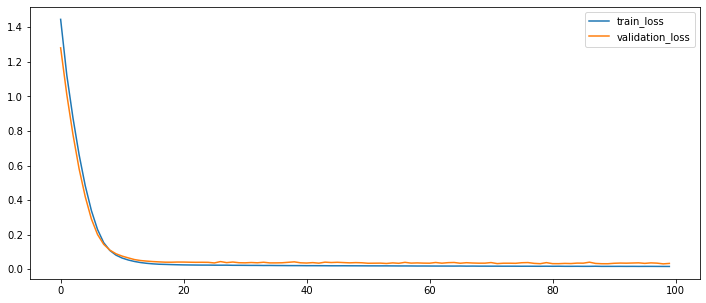

In [19]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(history_mlp.history['loss'],label='train_loss')
ax.plot(history_mlp.history['val_loss'],label='validation_loss')
ax.legend()

## predict test set

In [20]:
predict_mlp=model_mlp.predict(X_test_s)
predict_mlp.shape

(306, 1)

In [36]:
y_test_s.shape

(306, 1)

## MSE

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse_mlp=mean_squared_error(y_test_s,predict_mlp)

In [23]:
mse_mlp

0.015349180899627102

## Inverse_transfrom

In [24]:
inv_y_test=scaler.inverse_transform(y_test_s)
inv_y_pred=scaler.inverse_transform(predict_mlp)

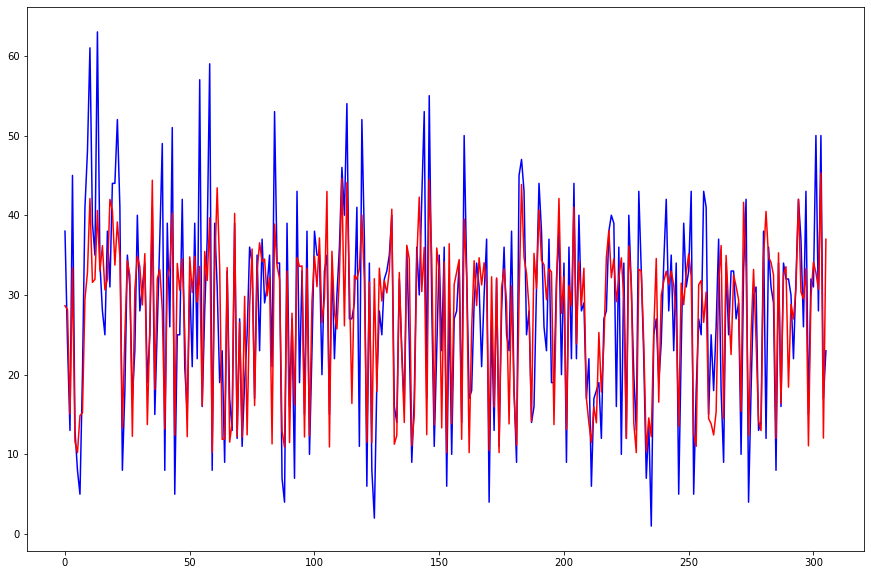

In [25]:
fig=plt.figure(figsize=(15,10))
plt.plot(inv_y_test[:,:2],color='b',label="Real")
plt.plot(inv_y_pred,color='r',label="predicted")


## predict next step

In [42]:
type(X_test_s)

numpy.ndarray

In [43]:
input_samples=X_test_s[-1:,:]

In [44]:
input_samples.shape

(1, 180)

In [45]:
next_step=model_mlp.predict(input_samples)
next_step=scaler.inverse_transform(next_step)

In [46]:
next_step

array([[37.164993]], dtype=float32)

## simple RNN

## 3d input shpe

In [19]:
X_train_3d=X_train_s.reshape(X_train_s.shape[0],X_train_s.shape[1],1)                         
X_test_3d=X_test_s.reshape(X_test_s.shape[0],X_test_s.shape[1],1)                         

In [21]:
X_train_3d.shape,X_test_3d.shape

((687, 180, 1), (306, 180, 1))

In [22]:
from keras.layers import SimpleRNN

In [30]:
model_simple_RNN=Sequential()
model_simple_RNN.add(SimpleRNN(10,activation="relu",
                               input_shape=(X_train_3d.shape[1],X_train_3d.shape[2]),
                               return_sequences=True))
model_simple_RNN.add(SimpleRNN(20,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.001),return_sequences=True))
model_simple_RNN.add(SimpleRNN(30,activation="relu", kernel_regularizer=tf.keras.regularizers.L1(0.001),return_sequences=False))
model_simple_RNN.add(Dense(n_step))
model_simple_RNN.compile(optimizer='adam', loss='mse')


In [31]:
history_rnn=model_simple_RNN.fit(X_train_3d,y_train_s,epochs=45,
                                 validation_data=(X_validation_s,y_validation_s),
                     batch_size=16)

Epoch 1/45
43/43 [==============================] - 7s 118ms/step - loss: 0.6127 - val_loss: 0.1996
Epoch 2/45
43/43 [==============================] - 5s 109ms/step - loss: 0.1673 - val_loss: 0.1817
Epoch 3/45
43/43 [==============================] - 5s 109ms/step - loss: 0.1582 - val_loss: 0.1739
Epoch 4/45
43/43 [==============================] - 5s 111ms/step - loss: 0.1494 - val_loss: 0.1608
Epoch 5/45
43/43 [==============================] - 5s 109ms/step - loss: 0.1412 - val_loss: 0.1538
Epoch 6/45
43/43 [==============================] - 5s 122ms/step - loss: 0.1347 - val_loss: 0.1488
Epoch 7/45
43/43 [==============================] - 5s 112ms/step - loss: 0.1291 - val_loss: 0.1434
Epoch 8/45
43/43 [==============================] - 5s 108ms/step - loss: 0.1238 - val_loss: 0.1397
Epoch 9/45
43/43 [==============================] - 5s 109ms/step - loss: 0.1208 - val_loss: 0.1341
Epoch 10/45
43/43 [==============================] - 5s 108ms/step - loss: 0.1179 - val_loss: 0.1333

In [52]:
#history_rnn.history

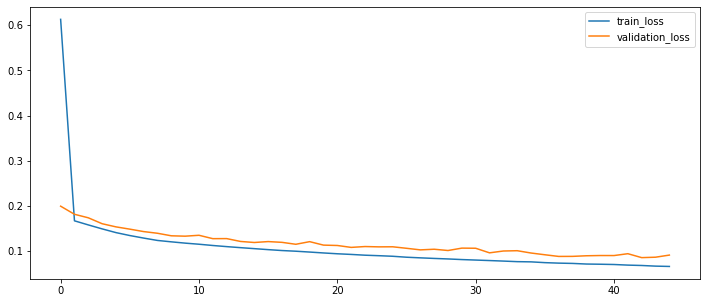

In [32]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(history_rnn.history['loss'],label='train_loss')
ax.plot(history_rnn.history['val_loss'],label='validation_loss')
ax.legend()

## predict test

In [33]:
predict_simpleRNN=model_simple_RNN.predict(X_test_3d)
predict_simpleRNN.shape

(306, 1)

In [34]:
mse_simpleRNN=mean_squared_error(y_test_s,predict_simpleRNN)
mse_simpleRNN

0.01666206792878608

In [35]:
inv_y_pred_simpleRnn=scaler.inverse_transform(predict_simpleRNN)

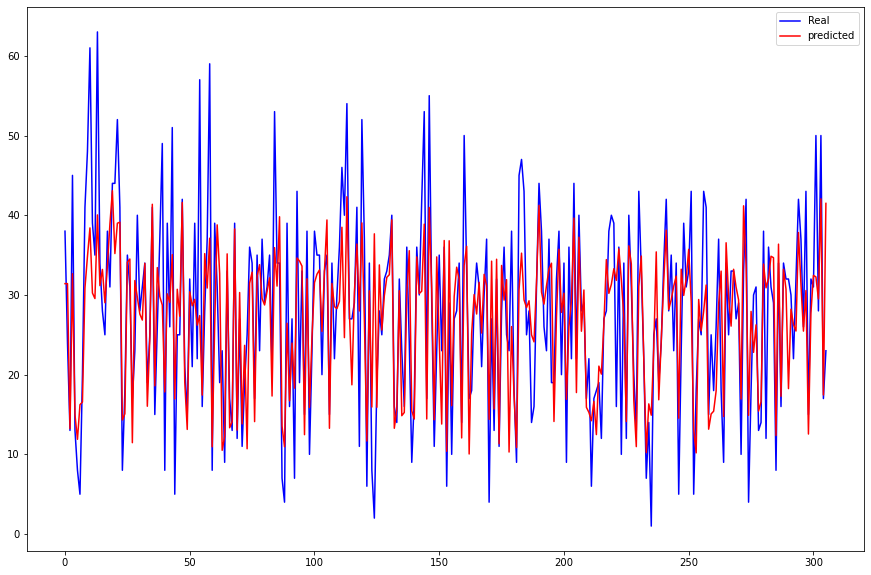

In [36]:
fig=plt.figure(figsize=(15,10))
plt.plot(inv_y_test[:,:2],color='b',label="Real")
plt.plot(inv_y_pred_simpleRnn,color='r',label="predicted")
plt.legend()


In [59]:
input_samples=X_test_3d[-1:,:,:]
next_step_simpleRNN=model_simple_RNN.predict(input_samples)
next_step_simpleRNN=scaler.inverse_transform(next_step_simpleRNN)
next_step_simpleRNN


array([[35.12343]], dtype=float32)

## GRU

In [20]:
from keras.layers import GRU

In [35]:
model_Gru=Sequential()
model_Gru.add(GRU(20,activation="relu",input_shape=(X_train_3d.shape[1],X_train_3d.shape[2])
                  ,return_sequences=True))
model_Gru.add(GRU(30,activation="relu",
                  return_sequences=True))
model_Gru.add(GRU(40,activation="relu",
                  return_sequences=False))  
model_Gru.add(Dense(n_step))
model_Gru.compile(optimizer="adam", loss='mse')

In [71]:
history_gru=model_Gru.fit(X_train_3d,y_train_s,epochs=100,
                          validation_data=(X_validation_s,y_validation_s),
              batch_size=16)

Epoch 1/100
43/43 [==============================] - 9s 218ms/step - loss: 0.0227 - val_loss: 0.0466
Epoch 2/100
43/43 [==============================] - 10s 241ms/step - loss: 0.0201 - val_loss: 0.0440
Epoch 3/100
43/43 [==============================] - 10s 241ms/step - loss: 0.0193 - val_loss: 0.0482
Epoch 4/100
43/43 [==============================] - 9s 210ms/step - loss: 0.0158 - val_loss: 0.0337
Epoch 5/100
43/43 [==============================] - 9s 209ms/step - loss: 0.0146 - val_loss: 0.0281
Epoch 6/100
43/43 [==============================] - 9s 209ms/step - loss: 0.0139 - val_loss: 0.0368
Epoch 7/100
43/43 [==============================] - 9s 210ms/step - loss: 0.0137 - val_loss: 0.0302
Epoch 8/100
43/43 [==============================] - 9s 215ms/step - loss: 0.0127 - val_loss: 0.0414
Epoch 9/100
43/43 [==============================] - 9s 210ms/step - loss: 0.0141 - val_loss: 0.0351
Epoch 10/100
43/43 [==============================] - 9s 213ms/step - loss: 0.0135 - val_

In [63]:
#history_gru.history

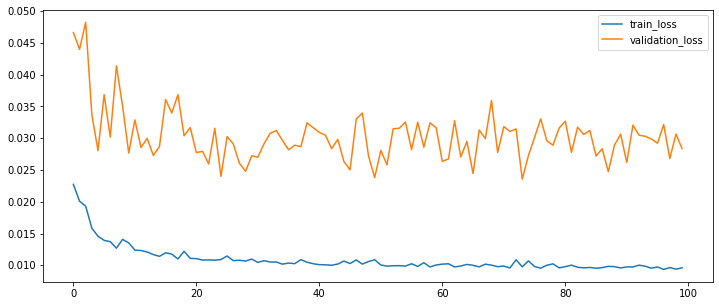

In [72]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(history_gru.history['loss'],label='train_loss')
ax.plot(history_gru.history['val_loss'],label='validation_loss')
ax.legend()

In [73]:
predict_Gru=model_Gru.predict(X_test_3d)
predict_Gru.shape

(306, 1)

In [74]:
mse_Gru=mean_squared_error(y_test_s,predict_Gru)
mse_Gru

0.014522236207253793

In [75]:
inv_y_test=scaler.inverse_transform(y_test_s)
inv_y_pred_GRU=scaler.inverse_transform(predict_Gru)


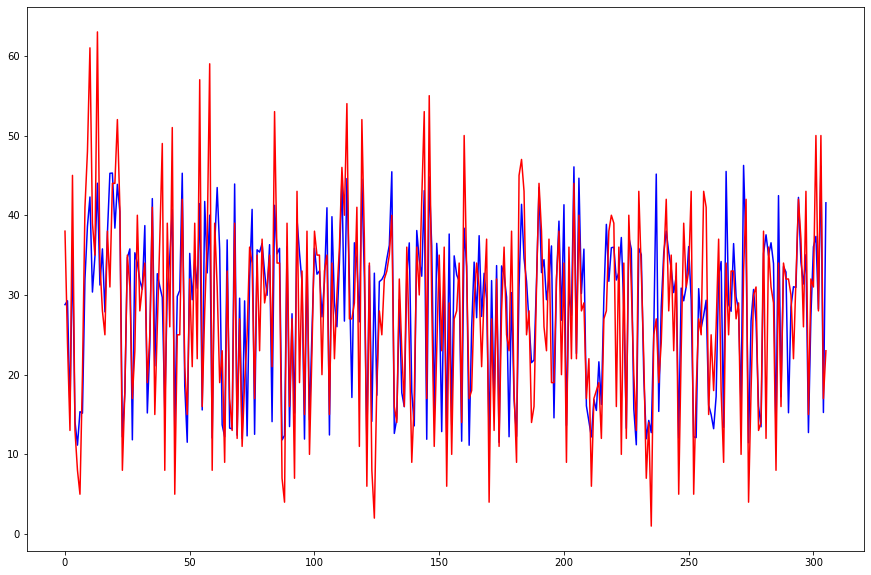

In [76]:
fig=plt.figure(figsize=(15,10))
plt.plot(inv_y_pred_GRU[:,:2],color='b',label="Real")
plt.plot(inv_y_test,color='r',label="predicted")


In [69]:
input_samples=X_test_3d[-1:,:,:]
next_step_Gru=model_Gru.predict(input_samples)
next_step_Gru=scaler.inverse_transform(next_step_Gru)
next_step_Gru

array([[27.55783]], dtype=float32)

## LSTM

In [77]:
from keras.layers import LSTM

In [58]:
model_LSTM=Sequential()
model_LSTM.add(LSTM(10,activation="relu",input_shape=(X_train_3d.shape[1],X_train_3d.shape[2])
                    ,return_sequences=True))
model_LSTM.add(LSTM(20,activation="relu"
                    , return_sequences=True))
model_LSTM.add(LSTM(30,activation="relu"
                    ,return_sequences=False))
model_LSTM.add(Dense(n_step))
model_LSTM.compile(optimizer="adam", loss='mse')

In [65]:
history_lstm=model_LSTM.fit(X_train_3d,y_train_s,epochs=100,validation_data=(X_validation_s,y_validation_s),
               batch_size=16)

Epoch 1/100
43/43 [==============================] - 8s 188ms/step - loss: 0.0340 - val_loss: 0.0672
Epoch 2/100
43/43 [==============================] - 9s 217ms/step - loss: 0.0339 - val_loss: 0.0575
Epoch 3/100
43/43 [==============================] - 8s 182ms/step - loss: 0.0336 - val_loss: 0.0576
Epoch 4/100
43/43 [==============================] - 8s 182ms/step - loss: 0.0336 - val_loss: 0.0583
Epoch 5/100
43/43 [==============================] - 8s 183ms/step - loss: 0.0343 - val_loss: 0.0627
Epoch 6/100
43/43 [==============================] - 8s 183ms/step - loss: 0.0333 - val_loss: 0.0605
Epoch 7/100
43/43 [==============================] - 8s 183ms/step - loss: 0.0333 - val_loss: 0.0628
Epoch 8/100
43/43 [==============================] - 8s 198ms/step - loss: 0.0328 - val_loss: 0.0576
Epoch 9/100
43/43 [==============================] - 8s 185ms/step - loss: 0.0325 - val_loss: 0.0521
Epoch 10/100
43/43 [==============================] - 8s 184ms/step - loss: 0.0334 - val_lo

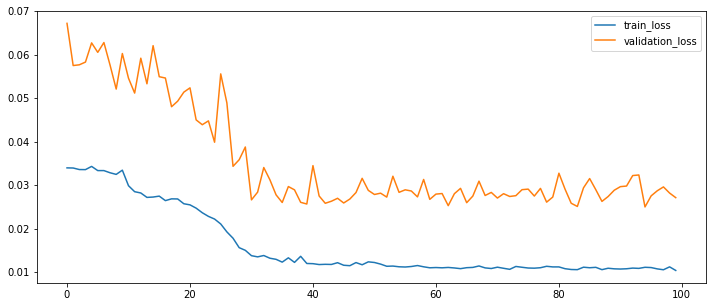

In [66]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(history_lstm.history['loss'],label='train_loss')
ax.plot(history_lstm.history['val_loss'],label='validation_loss')
ax.legend()

In [67]:
predict_LSTM=model_LSTM.predict(X_test_3d)
predict_LSTM.shape

(306, 1)

In [68]:
mse_LSTM=mean_squared_error(y_test_s,predict_LSTM)
mse_LSTM

0.014116267558150122

In [69]:
inv_y_pred_LSTM=scaler.inverse_transform(predict_LSTM)

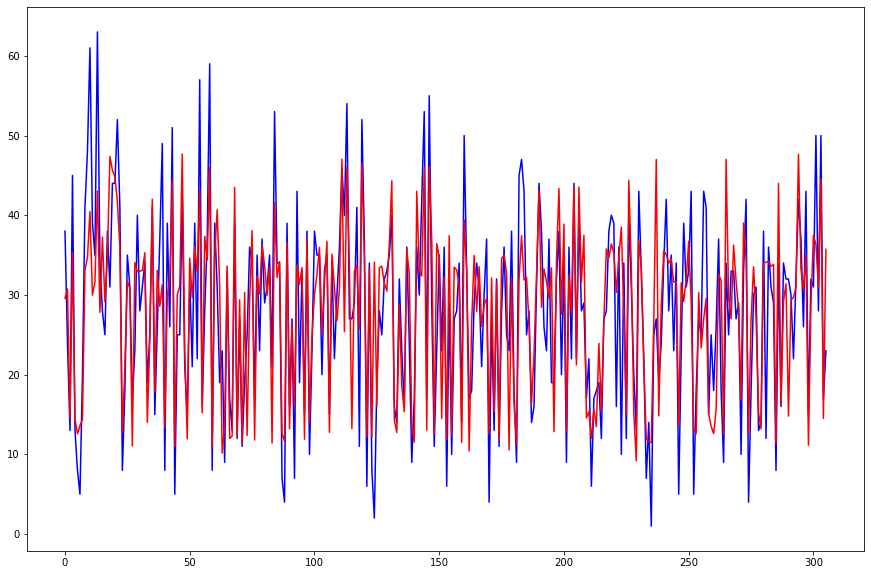

In [70]:
fig=plt.figure(figsize=(15,10))
plt.plot(inv_y_test,color='b',label="Real")
plt.plot(inv_y_pred_LSTM,color='r',label="predicted")

In [ ]:
fig=plt.figure(figsize=(15,10))
plt.plot(inv_y_test,color='b',label="Real")

In [ ]:
input_samples=X_test_3d[-1:,:,:]
next_step_LSTM=model_LSTM.predict(input_samples)
next_step_LSTM=scaler.inverse_transform(next_step_LSTM)
next_step_LSTM

## CNN

In [78]:
from keras.layers import Conv1D,MaxPooling1D,Flatten

In [86]:
model_CNN=Sequential()
model_CNN.add(Conv1D(filters=32, kernel_size=3, activation="relu",
                     input_shape=(X_train_3d.shape[1],X_train_3d.shape[2])))
model_CNN.add(Conv1D(filters=32, kernel_size=3, activation="relu"))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Conv1D(filters=16, kernel_size=3, activation="relu"))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(n_step))
model_CNN.compile(optimizer="adam", loss='mse')


In [87]:
history_cnn=model_CNN.fit(X_train_3d,y_train_s,epochs=100,
              validation_data=(X_validation_s,y_validation_s),batch_size=16)

Epoch 1/100
43/43 [==============================] - 1s 14ms/step - loss: 0.0491 - val_loss: 0.0493
Epoch 2/100
43/43 [==============================] - 0s 11ms/step - loss: 0.0213 - val_loss: 0.0373
Epoch 3/100
43/43 [==============================] - 0s 11ms/step - loss: 0.0157 - val_loss: 0.0273
Epoch 4/100
43/43 [==============================] - 0s 11ms/step - loss: 0.0139 - val_loss: 0.0260
Epoch 5/100
43/43 [==============================] - 1s 17ms/step - loss: 0.0121 - val_loss: 0.0331
Epoch 6/100
43/43 [==============================] - 0s 11ms/step - loss: 0.0118 - val_loss: 0.0283
Epoch 7/100
43/43 [==============================] - 0s 11ms/step - loss: 0.0116 - val_loss: 0.0288
Epoch 8/100
43/43 [==============================] - 1s 12ms/step - loss: 0.0122 - val_loss: 0.0300
Epoch 9/100
43/43 [==============================] - 1s 12ms/step - loss: 0.0117 - val_loss: 0.0289
Epoch 10/100
43/43 [==============================] - 0s 11ms/step - loss: 0.0118 - val_loss: 0.0255

In [ ]:
# history_cnn.history

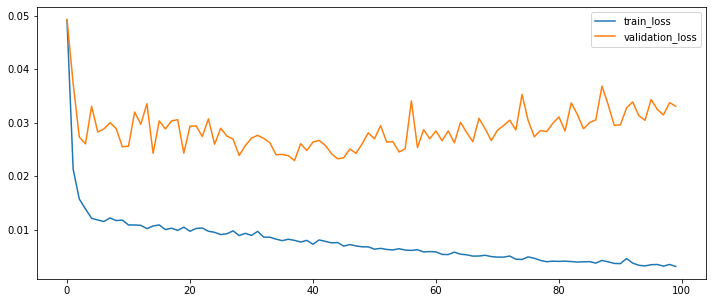

In [88]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(history_cnn.history['loss'],label='train_loss')
ax.plot(history_cnn.history['val_loss'],label='validation_loss')
ax.legend()

In [89]:
predict_CNN=model_CNN.predict(X_test_3d)
predict_CNN.shape

(306, 1)

In [90]:
mse_CNN=mean_squared_error(y_test_s,predict_CNN)
mse_CNN

0.02664406123637051

In [91]:
inv_y_pred_CNN=scaler.inverse_transform(predict_CNN)

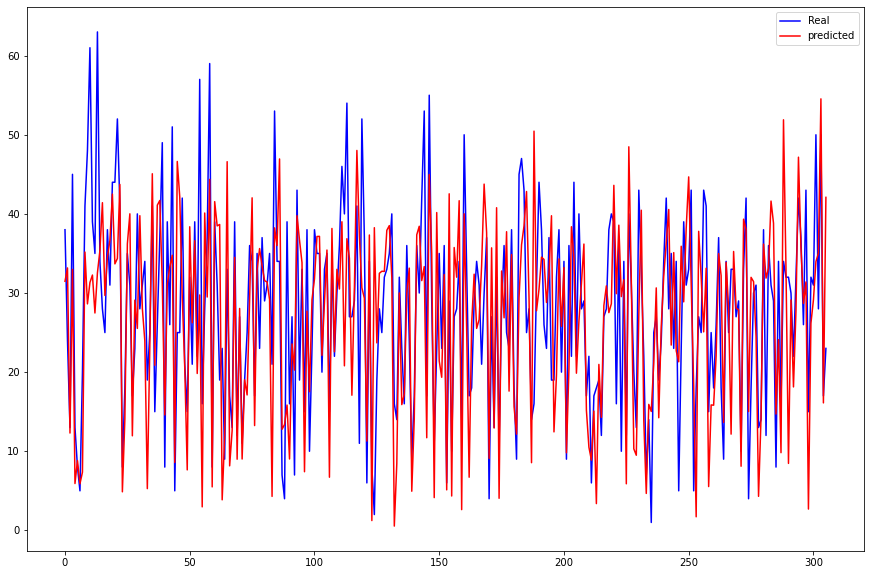

In [92]:
fig=plt.figure(figsize=(15,10))
plt.plot(inv_y_test,color='b',label="Real")
plt.plot(inv_y_pred_CNN,color='r',label="predicted")
plt.legend()

In [93]:
input_samples=X_test_3d[-1:,:,:]
next_step_CNN=model_CNN.predict(input_samples)
next_step_CNN=scaler.inverse_transform(next_step_CNN)
next_step_CNN

array([[42.08913]], dtype=float32)

## Result comparision

In [94]:
result={"MLP":mse_mlp, "SimpleRnn":mse_simpleRNN, "GRU":mse_Gru, "LSTM":mse_LSTM, "CNN":mse_CNN}

NameError: name 'mse_mlp' is not defined

In [ ]:
result=pd.DataFrame.from_dict(result,orient="index")

In [ ]:
result

In [ ]:
result.plot(kind="bar",figsize=(5,2))